# Probability distributions‌ in air quality data

## **Introduction**

In this notebook, I will determine which type of probability distribution best fits data, calculate z-score, and detect outliers . I will work with data from the United States Environmental Protection Agency (EPA). I will analyze data on air quality with respect to carbon monoxide, a major air pollutant. The data includes information from more than 200 sites, identified by state, county, city, and local site names. One of the main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, I will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

In [1]:
# Import relevant libraries, packages, and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
# import data
data = pd.read_csv("modified_c4_epa_air_quality.csv")

## **Step 2: Data exploration** 

In [4]:
# Display first 10 rows of the data.
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


To better understand the quantity of data I'm working with, I will display the number of rows and the number of columns.

In [5]:
data.shape

(260, 8)

Now, I will create a histogram to find out whether `aqi_log` fits a specific type of probability distribution.

<Axes: >

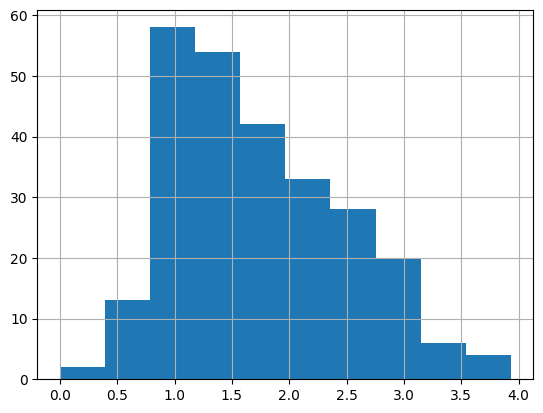

In [6]:
# Create a histogram to visualize distribution of aqi_log.
data['aqi_log'].hist()

The histogram is skewed to the to the right and follows a normal distribution. We can tell that because it has a bell shape. 

## **Step 3: Statistical tests**

By the empirical rule, we know that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, I will define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help me easily access these measures. 

In [7]:
# aqi_log mean.
aqi_mean = data['aqi_log'].mean()

# Print out the mean.
aqi_mean

1.7669210929985582

In [8]:
# aqi_log standard deviation.
aqi_std = data['aqi_log'].std()

# Print out the standard deviation.
aqi_std

0.7147155520223721

Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, I will define the lower limit and the upper limit . This will enable me to create a range and confirm whether each value falls within it.

In [9]:
# lower limit, 1 standard deviation below the mean.
lower_limit = aqi_mean - 1*aqi_std

# upper limit, 1 standard deviation above the mean.
upper_limit = aqi_mean + 1*aqi_std

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

1.052205540976186 2.4816366450209304


In [10]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
((data['aqi_log']>=lower_limit) & (data['aqi_log']<=upper_limit)).mean()

0.7615384615384615

Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, I will define the lower limit and the upper limit. This will enable you to create a range and confirm whether each value falls within it.

In [11]:
# lower limit, 2 standard deviations below the mean.
lower_limit = aqi_mean - 2*aqi_std

# upper limit, 2 standard deviations below the mean.
upper_limit = aqi_mean + 2*aqi_std

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

0.3374899889538139 3.1963521970433026


In [12]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.
((data['aqi_log']>=lower_limit) & (data['aqi_log']<=upper_limit)).mean()

0.9576923076923077

Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, I will define the lower limit and the upper limit . This will enable you to create a range and confirm whether each value falls within it.

In [13]:
# lower limit, 3 standard deviations below the mean.
lower_limit = aqi_mean - 3*aqi_std

# upper limit, 3 standard deviations above the mean.
upper_limit = aqi_mean + 3*aqi_std

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

-0.37722556306855815 3.9110677490656744


In [14]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.
((data['aqi_log']>=lower_limit) & (data['aqi_log']<=upper_limit)).mean()

0.9961538461538462

## **Step 4: Results and evaluation** 

I will compute the z-score for every `aqi_log` value. Afterwards, I'll add a column named `z_score` in the data to store those results. 

In [15]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
data['z-score'] = stats.zscore(data['aqi_log'])

# Display the first 5 rows to ensure that the new column was added.
data.head(5)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z-score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


Now let's identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [16]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
outsite_limits_mask = ((data['z-score']>3) | (data['z-score']<-3))
data_ol = data[outsite_limits_mask].head()
data_ol.head(5)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z-score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


The aqi_log from West Phoenix is above 3 standard deviations of the mean. This means that the air quality at that site is worse in average with the rest of the data. 

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 